# Rain prediction

## Metadata

- Date: The date of observation 
- Location: The common name of the location of the weather station
- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall: The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day.
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am
- WindDir3pm: Direction of the wind at 3pm
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am: Humidity (percent) at 9am
- Humidity3pm: Humidity (percent) at 3pm
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 
- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am: Temperature (degrees C) at 9am
- Temp3pm: Temperature (degrees C) at 3pm
- RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow: This column is Yes if the rain for that day was 1mm or more.

In [72]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

--2024-04-12 18:19:54--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle.3’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.03s   

2024-04-12 18:19:54 (1.30 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle.3’ saved [40905/40905]



## DATA COLLECTION

In [73]:
rain_data = pd.read_csv('rain_data.csv')

## QUICK LOOK AT DATA STRUCTURE

In [74]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)
    

In [75]:
data_explore(rain_data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (67021, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67021 entries, 0 to 67020
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           67021 non-null  object 
 1   Location       67021 non-null  object 
 2   MinTemp        65864 non-null  float64
 3   MaxTemp        65940 non-null  float64
 4   Rainfall       64271 non-null  float64
 5   Evaporation    37591 non-null  float64
 6   Sunshine       34831 non-null  float64
 7   WindGustDir    61534 non-null  object 
 8   WindGustSpeed  61576 non-null  float64
 9   WindDir9am     62270 non-null  object 
 10  WindDir3pm     64733 non-null  object 
 11  WindSpeed9am   65971 non-null  float64
 12  WindSpeed3pm   65328 non-null  float64
 13  Humidity9am    65257 non-null  floa

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

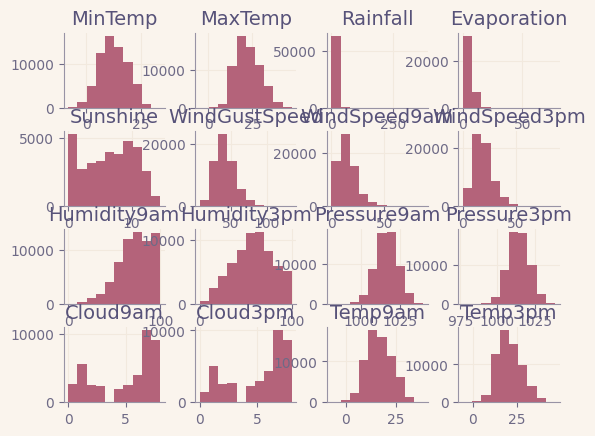

In [76]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rain_data.hist()

### Erase instances where we dont have the target

In [77]:
rain_data_new = rain_data.dropna(subset = ["RainTomorrow"])

In [78]:
rain_data_new["RainTomorrow"].isnull().sum()

0

In [79]:
rain_data = rain_data_new.copy()

Observations:

- Missings: 4 features with more than 37% Missings.

- Categorical variables: Turn Date into months\/seasons, cities intro countries\/ranking of raining countries..

- Numerical: Clouds multimodal, log to rainfall evaporation 

- Outliers: Rainfall, evaporation!!

- Encoding good!

- Balanced target!

## CREATE TEST SET

In [80]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    rain_data, test_size=0.2, stratify=rain_data["RainTomorrow"], random_state=42)

In [81]:
df = strat_train_set.copy()

## EXPLORATORY DATA ANALYSIS(EDA)

In [82]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (51003, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 51003 entries, 66813 to 14746
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           51003 non-null  object 
 1   Location       51003 non-null  object 
 2   MinTemp        50749 non-null  float64
 3   MaxTemp        50890 non-null  float64
 4   Rainfall       50290 non-null  float64
 5   Evaporation    28965 non-null  float64
 6   Sunshine       26816 non-null  float64
 7   WindGustDir    47393 non-null  object 
 8   WindGustSpeed  47426 non-null  float64
 9   WindDir9am     47648 non-null  object 
 10  WindDir3pm     49512 non-null  object 
 11  WindSpeed9am   50491 non-null  float64
 12  WindSpeed3pm   49979 non-null  float64
 13  Humidity9am    50286 non-null  float

In [83]:
cat_cols=[i for i in df.columns if df.dtypes[i]=='object'][:-1]
num_cols = [i for i in df.columns if df.dtypes[i]!='object']
target = "RainTomorrow"

In [84]:
mapping = {'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(mapping)

### Target EDA

In [85]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

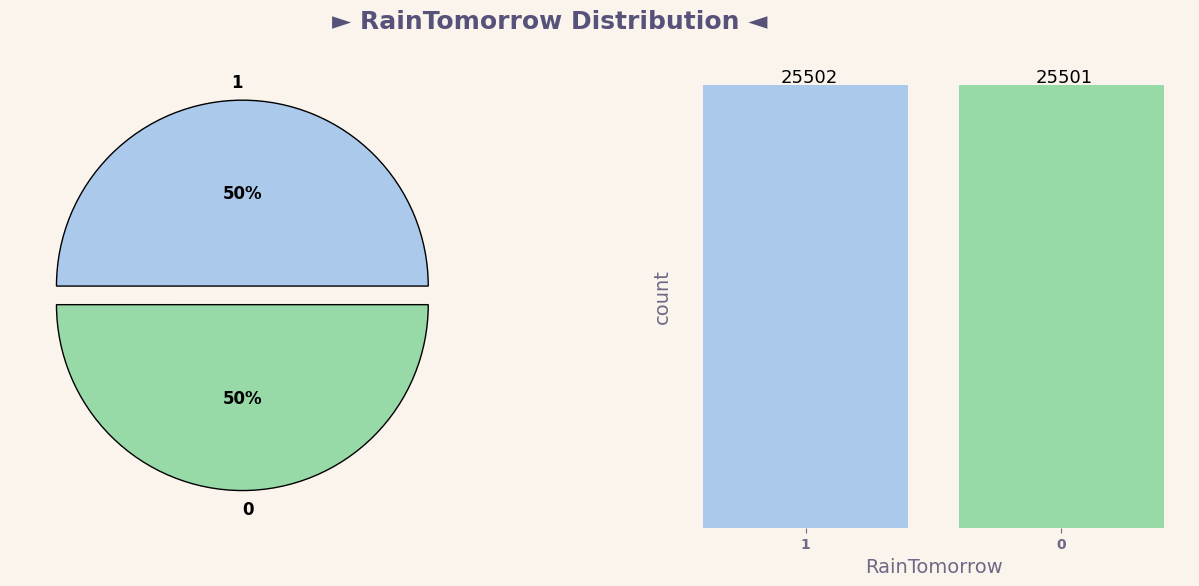

In [86]:
plot_target(df, 
            col=target, 
            title=target, 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

### Date

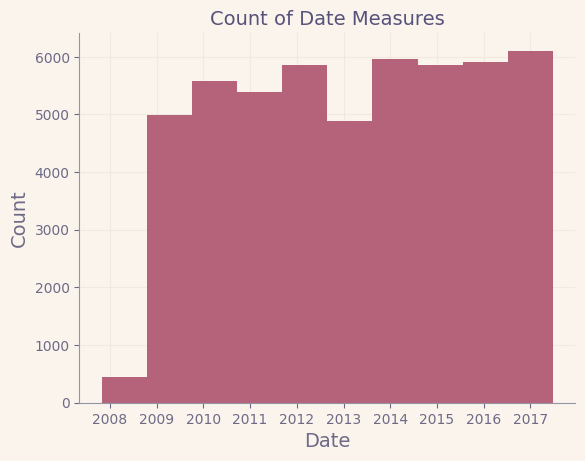

In [87]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].hist()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Date Measures')
plt.show()

**We can see how we got data from 2008 to 2017. Where 2008 is the least measured year**

In [88]:
mean_rain = df.groupby(df['Date'].dt.date)['RainTomorrow'].mean()

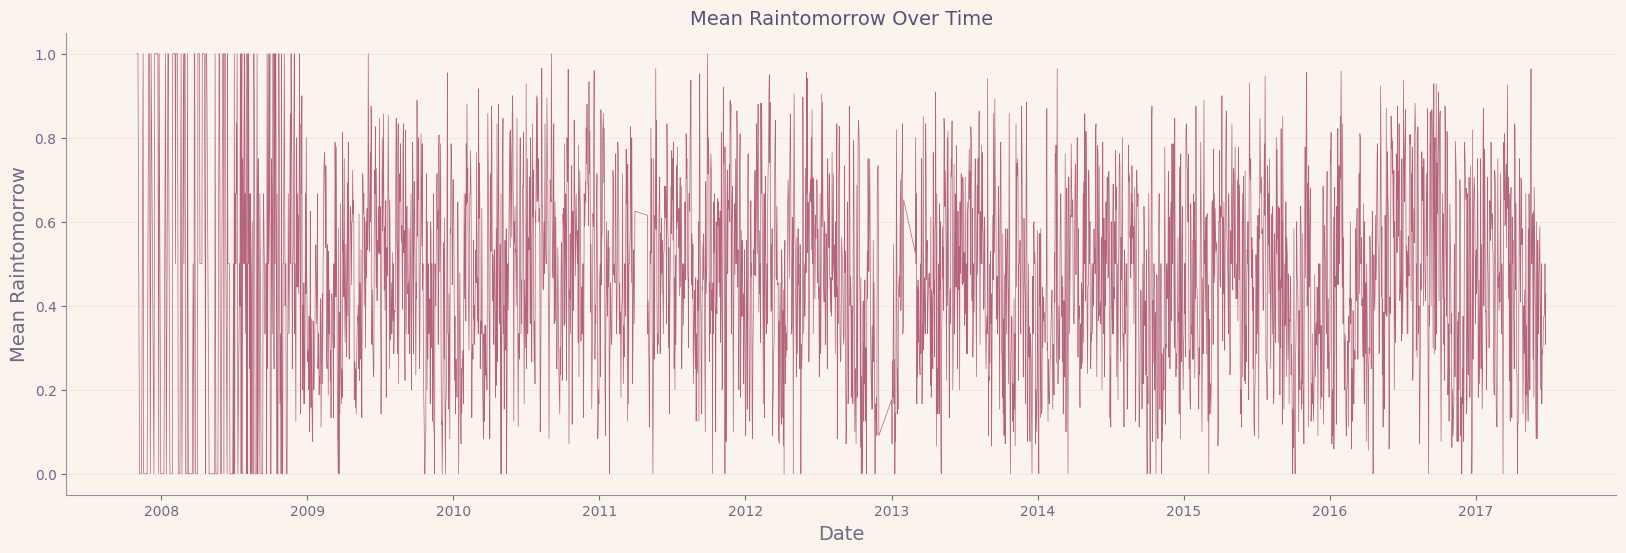

In [89]:
plt.figure(figsize=(20,6))
sns.lineplot(x=mean_rain.index, y=mean_rain.values,linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Mean Raintomorrow')
plt.title('Mean Raintomorrow Over Time')
plt.show()

We cannot see much of a trend in the mean of RainTomorrow variable, in 2008 we can see extreme values as we have few records. We can slightly see some seasonality.

### Location

In [90]:
pd.crosstab(df.RainTomorrow,df.Location,margins=True).style.background_gradient(cmap='summer_r')

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,All
RainTomorrow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,560,495,548,637,553,504,582,549,430,621,608,483,483,539,513,560,304,523,427,579,570,615,491,438,528,313,504,495,563,554,526,597,576,457,556,535,585,616,550,547,530,325,553,407,521,405,523,506,617,25501
1,555,751,503,197,470,618,450,563,738,515,309,689,746,664,635,598,214,560,515,519,262,311,727,644,575,194,646,726,473,407,467,500,453,880,461,524,371,702,625,415,458,95,424,771,579,568,720,556,159,25502
All,1115,1246,1051,834,1023,1122,1032,1112,1168,1136,917,1172,1229,1203,1148,1158,518,1083,942,1098,832,926,1218,1082,1103,507,1150,1221,1036,961,993,1097,1029,1337,1017,1059,956,1318,1175,962,988,420,977,1178,1100,973,1243,1062,776,51003


**We can see how countries are a good indicator of rain, as we can see most of them have significant differences on RainTomorrow target value**

Rain index (mm/year wikipedia) encoding? Will it behave the same way?

### Categorical features

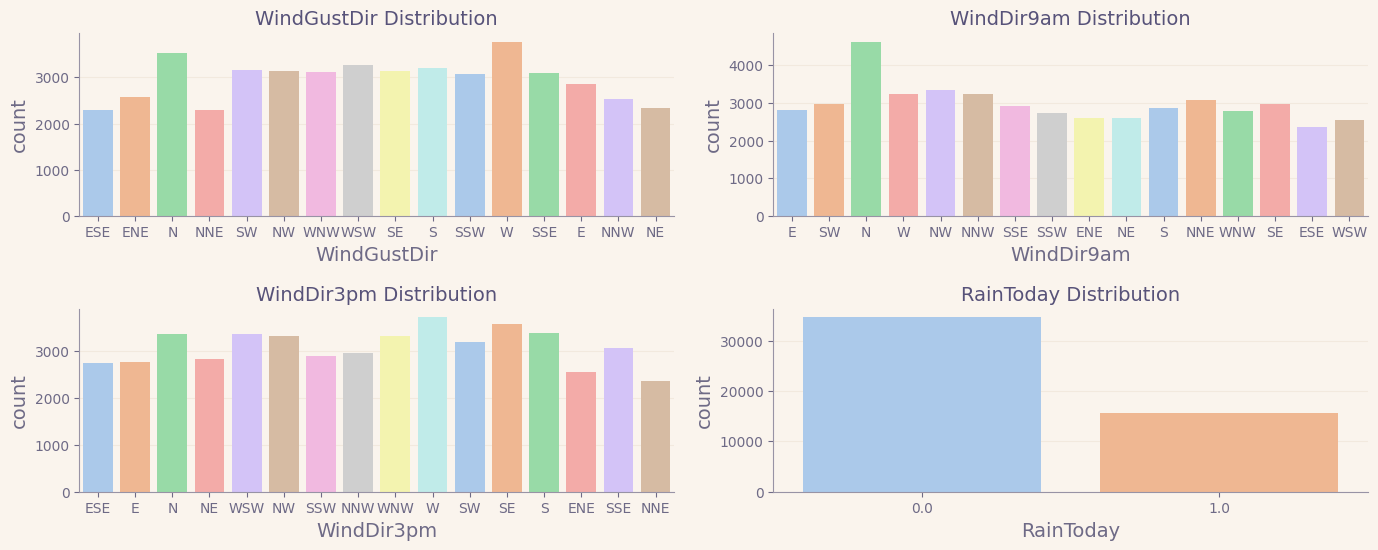

In [91]:
plt.figure(figsize=(14,len(cat_cols[2:])*2))
for idx,column in enumerate(cat_cols[2:]):
    plt.subplot(len(cat_cols[2:])//2+1,2,idx+1)
    sns.countplot(x=column, data=df,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    
plt.savefig("dist_cat")  
plt.show()

We can see quite high imbalance in RainToday feature

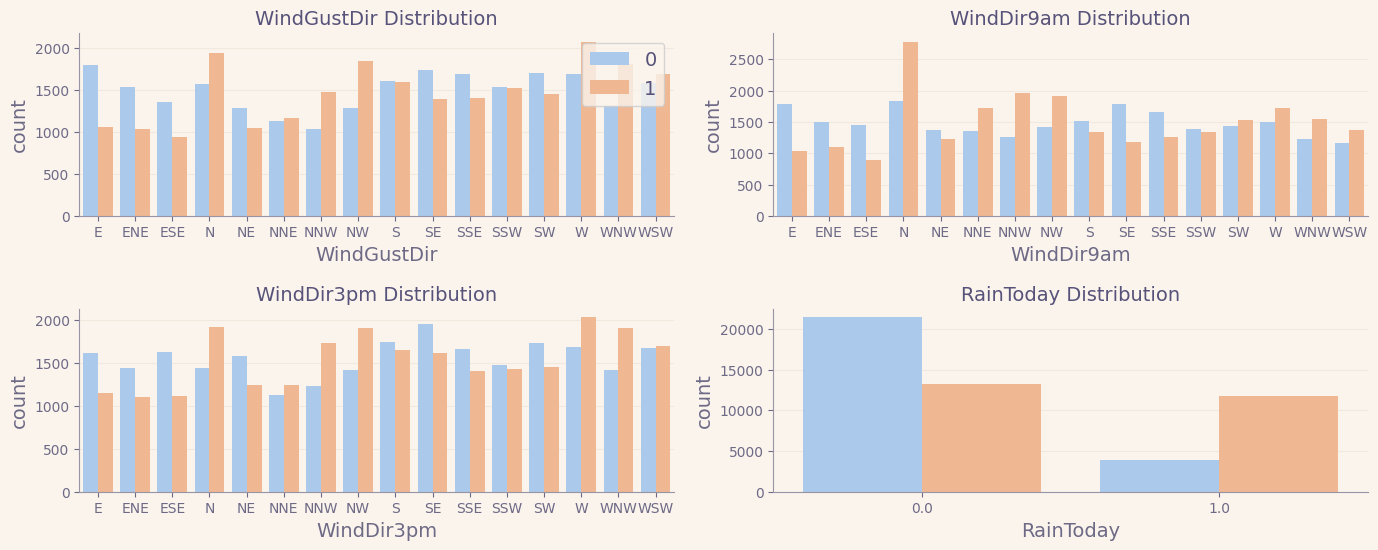

In [106]:
plt.figure(figsize=(14,len(cat_cols[2:])*2))
for idx,column in enumerate(cat_cols[2:]):
    plt.subplot(len(cat_cols[2:])//2+1,2,idx+1)
    modalities = sorted(df[column].astype(str).unique())
    modalities.pop()
 
    sns.countplot(x=column, hue=target, data=df.drop(columns = ["Date","Location"]),palette="pastel",order=modalities)
    plt.title(f"{column} Distribution")
    plt.legend(loc='upper right')
    plt.tight_layout()
    if idx == 0: 
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

We most likeli be doing circular encoding for wind variable, we can see some significancy. https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning. As the differences are mostly equal, we will be likely using only WindGustDir

In [ ]:
"""
def circular_encode_directions(data):
    encoded_data = pd.DataFrame()
    angles = np.linspace(0, 2 * np.pi, len(wind_directions), endpoint=False)
    for idx, direction in enumerate(data):
        angle = angles[wind_directions.index(direction)]
        encoded_data.loc[idx, 'sin_direction'] = np.sin(angle)
        encoded_data.loc[idx, 'cos_direction'] = np.cos(angle)
    return encoded_data
"""

## Numerical columns

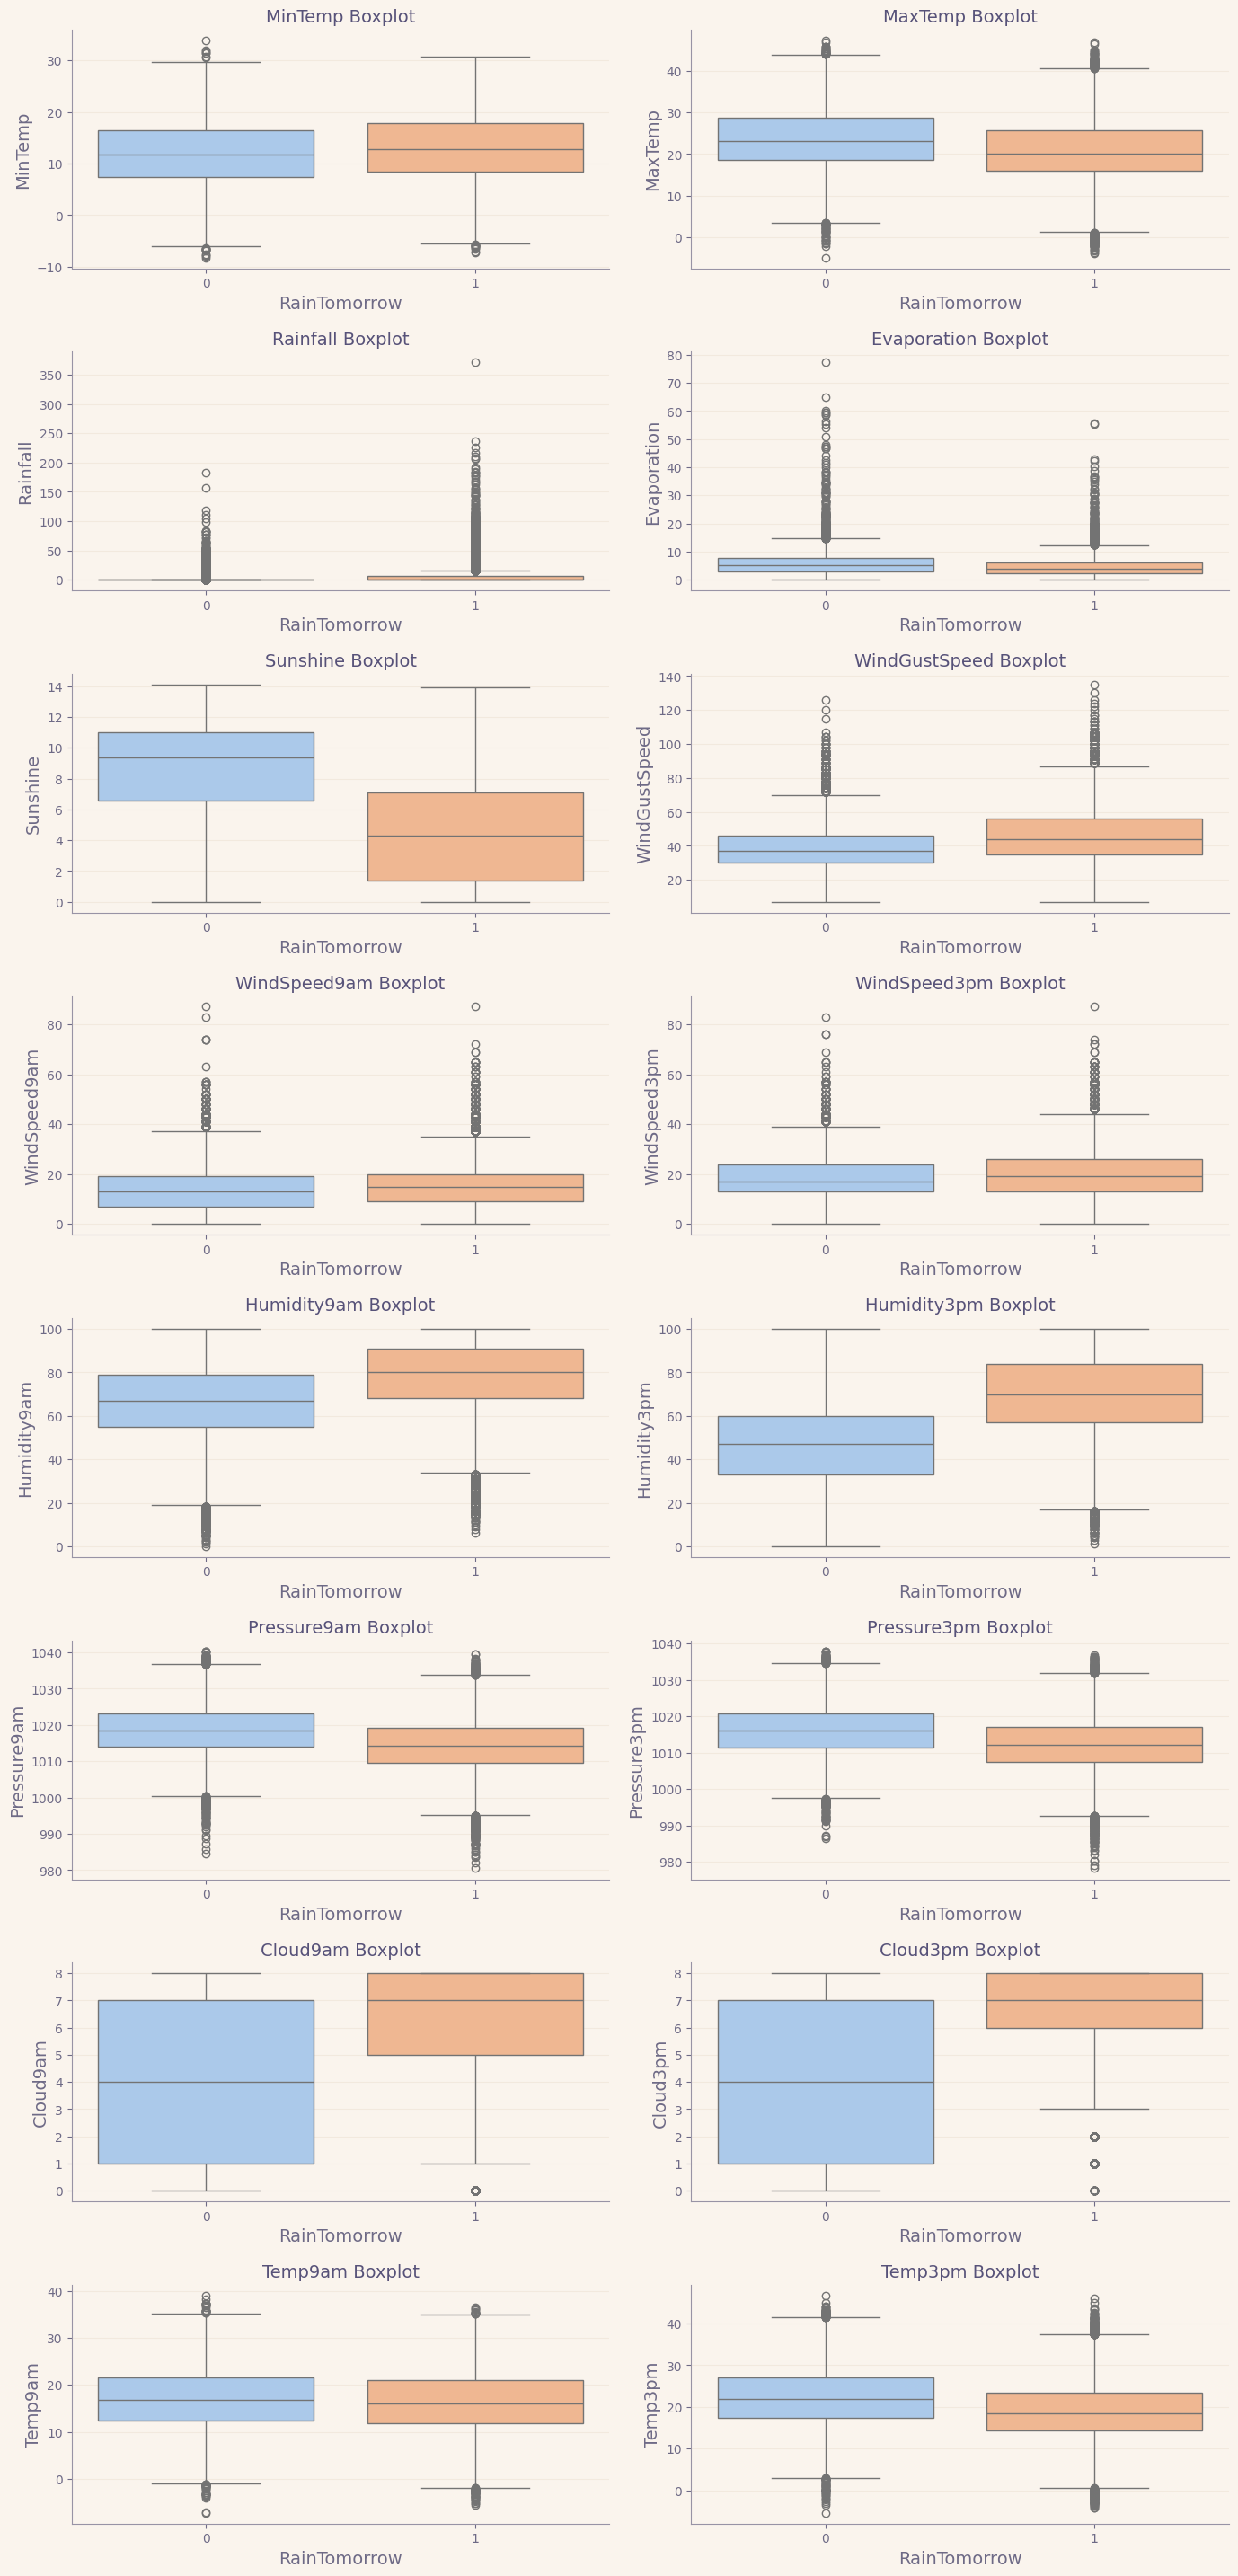

In [108]:
plt.figure(figsize=(14,len(num_cols)*2))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x=target, y=column, data=df,palette="pastel")
    plt.title(f"{column} Boxplot")
    plt.tight_layout()
    
plt.savefig("box_num")  
plt.show()

Obervations)
1. Sunshine has a significant effect
2. Humidity has quite effect
3. Both clouds have a significant effect
4. We can observe some univariate outliers at first sight

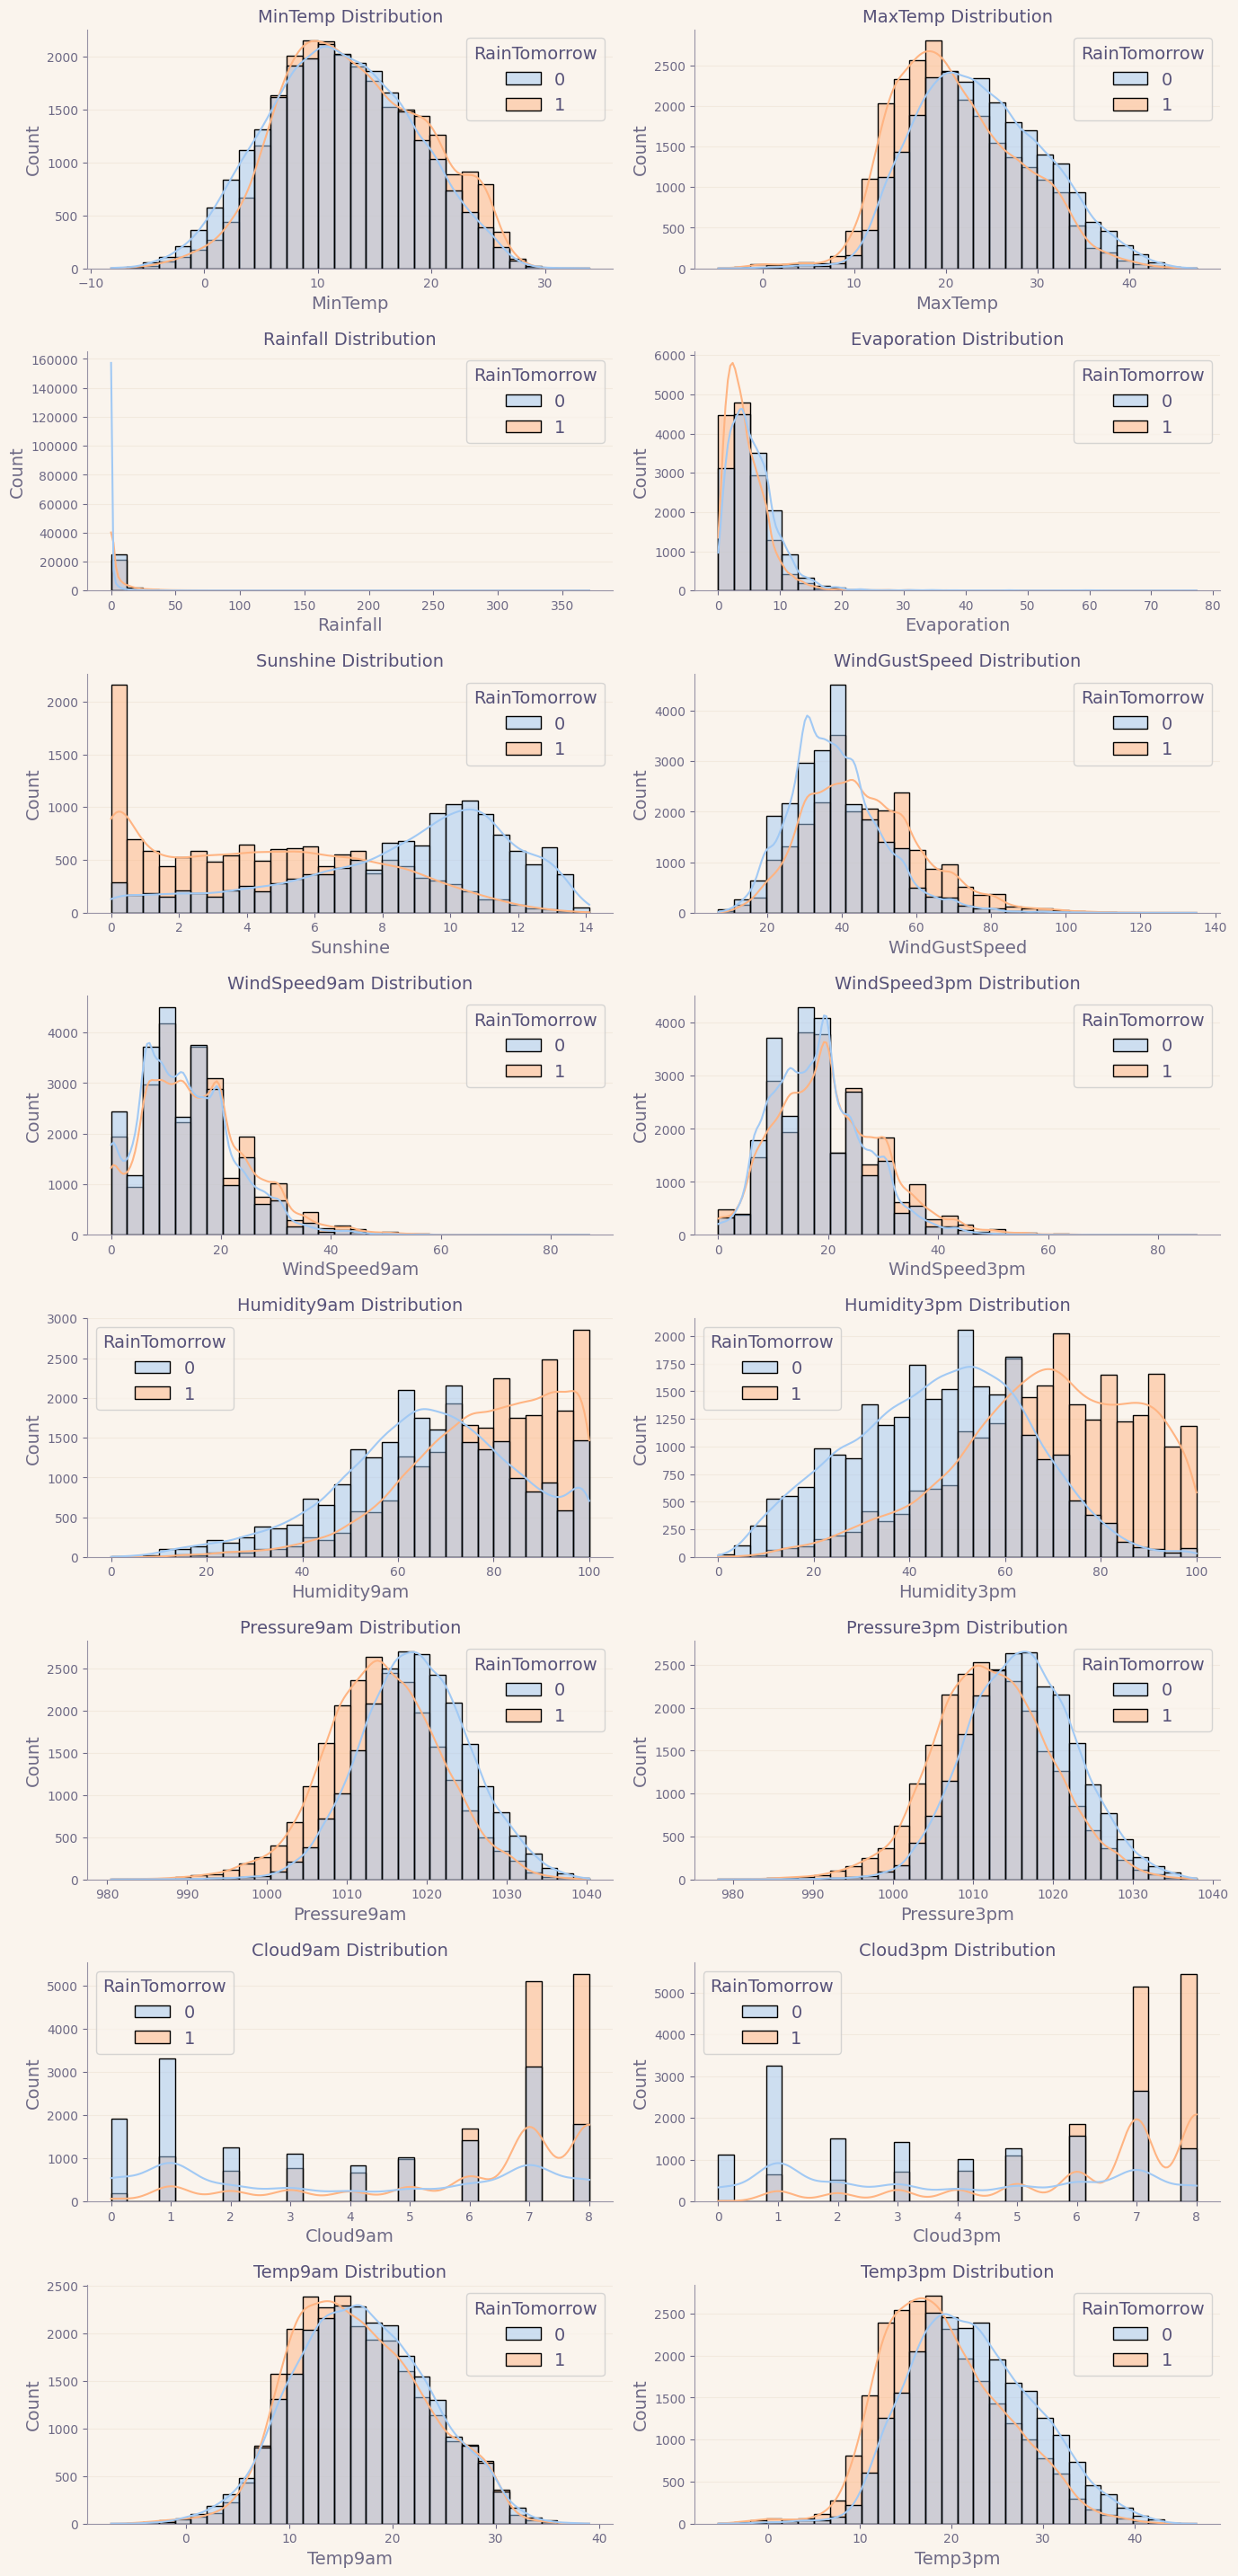

In [109]:
plt.figure(figsize=(14,len(num_cols)*2))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue=target, data=df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    
    
plt.savefig("dist_num")  
plt.show()

There's difference between the distributions variables that seemed not of much difference on the boxplots. This could help in more advanced.

## Interactions

In [112]:
df[num_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
66813,18.0,36.4,0.0,NaN,NaN,54.0,30.0,31.0,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0
2258,11.0,26.3,0.0,NaN,NaN,35.0,13.0,20.0,46.0,45.0,1017.2,1014.2,NaN,NaN,20.2,25.1
30078,7.9,12.7,6.2,2.2,7.0,59.0,39.0,43.0,81.0,71.0,1007.8,1006.6,3.0,6.0,9.0,12.4
8790,13.0,21.5,0.0,NaN,NaN,43.0,13.0,28.0,72.0,77.0,1012.1,1006.2,NaN,NaN,18.8,19.3
16636,11.6,20.8,2.2,5.6,8.0,57.0,28.0,30.0,69.0,30.0,1006.1,1005.8,3.0,6.0,14.8,19.5


<Axes: >

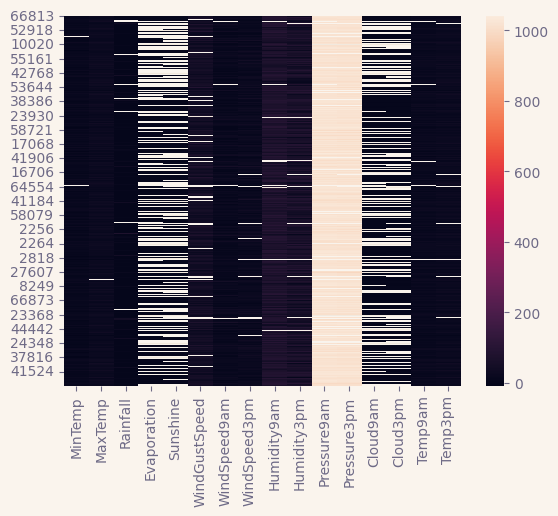

In [111]:
sns.heatmap(data= df[num_cols])